# Ryanair-Flug 4978

### Business Unterstanding

- startete am 23. Mai 2021 um 10:29 Uhr Ortszeit vom Flughafen Athen-Eleftherios Venizelos, Ziel war der Flughafen Vilnius
- um 12:30 Uhr Ortszeit erreichte die Boeing 737-800 den weißrussischen Luftraum, wo die Piloten durch die weißrussische Flugsicherung über eine angebliche Bombendrohung unterrichtet wurden: "[...] uns liegen Informationen der Dienste vor, nach denen Sie eine Bombe an Bord haben, die über Vilnius gezündet werden kann."-ATC Minsk [https://www.aero.de/news-39778/EU-Ryanair-Crew-wurde-in-der-Luft-bedraengt.html]
- der Flug wurde gegen 12:46 Uhr Ortszeit, kurz vor dem Einflug in den litauischen Luftraum, für eine angebliche Notlandung zum Nationalen Flughafen Minsk umdirigiert
- zum Zeitpunkt der Umlenkung um 12:46 Uhr Ortszeit war das Flugzeug 72 km vom Flughafen Vilnius und 30 km von der litauischen Grenze entfernt, von Minsk jedoch 183 km Luftlinie (bzw. 300 km Flugstrecke)
- das Flugzeug befand sich trotz dieser nur noch 72 km zum Ziel immer noch in Reiseflughöhe, obwohl Flugzeuge auf dieser Route normalerweise schon in 177 km Entfernung von Vilnius zum Sinkflug ansetzen
- um 13:21 Uhr Ortszeit landete das Flugzeug in Minsk
- der regimekritische Journalist Raman Pratassewitsch, der sich an Bord befand, wurde anschließend verhaftet, im Gepäck der Passagiere fand sich kein Hinweis auf Sprengstoff

##### Quelle: [Wikipedia] https://de.wikipedia.org/wiki/Ryanair-Flug_4978



### Data

In [10]:
import pandas as pd #Import libraries
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.patheffects as mpe
import matplotlib.ticker as mtick
import geopandas
from shapely.geometry import Point, Polygon

df = pd.read_csv("FR4978_27cce9a2.csv", sep=",") #Quelle: https://www.flightradar24.com/data/flights/fr4978#27cce9a2 (Letzter Zugriff: 24.08.2021)
df

,Timestamp,UTC,Callsign,Position,Altitude,Speed,Direction
0,1621754943,2021-05-23T07:29:03Z,RYR1TZ,"37.943665,23.962408",125,145,37
1,1621754953,2021-05-23T07:29:13Z,RYR1TZ,"37.949295,23.967785",325,161,37
2,1621754966,2021-05-23T07:29:26Z,RYR1TZ,"37.956924,23.975273",900,156,37
3,1621754978,2021-05-23T07:29:38Z,RYR1TZ,"37.964096,23.982319",1425,156,37
4,1621754988,2021-05-23T07:29:48Z,RYR1TZ,"37.96994,23.987888",1775,160,37
...,...,...,...,...,...,...,...
517,1621765273,2021-05-23T10:21:13Z,RYR1TZ,"53.887104,28.027693",0,24,317
518,1621765279,2021-05-23T10:21:19Z,RYR1TZ,"53.88763,28.026928",0,25,317
519,1621765291,2021-05-23T10:21:31Z,RYR1TZ,"53.888683,28.025356",0,25,317
520,1621765302,2021-05-23T10:21:42Z,RYR1TZ,"53.889221,28.024548",0,6,317


#### Vergleichsdatensatz (Standardflug von Athen nach Minsk)

In [11]:
df_standardflug = pd.read_csv("Standardflug_Athen_Vilnius.csv", sep=",") #Quelle: https://www.flightradar24.com/data/flights/fr4978#27ba7662 (Letzter Zugriff: 24.08.2021)
df_standardflug

,Timestamp,UTC,Callsign,Position,Altitude,Speed,Direction
0,1621148758,2021-05-16T07:05:58Z,RYR1TZ,"37.931774,23.943209",0,1,216
1,1621148784,2021-05-16T07:06:24Z,RYR1TZ,"37.931984,23.943403",0,2,219
2,1621148817,2021-05-16T07:06:57Z,RYR1TZ,"37.932182,23.943642",0,1,185
3,1621149028,2021-05-16T07:10:28Z,RYR1TZ,"37.932243,23.943869",0,7,120
4,1621149034,2021-05-16T07:10:34Z,RYR1TZ,"37.932083,23.944147",0,10,126
...,...,...,...,...,...,...,...
370,1621158312,2021-05-16T09:45:12Z,RYR1TZ,"54.644211,25.28261",0,9,267
371,1621158316,2021-05-16T09:45:16Z,RYR1TZ,"54.644112,25.282351",0,9,239
372,1621158320,2021-05-16T09:45:20Z,RYR1TZ,"54.644016,25.282125",0,8,239
373,1621158326,2021-05-16T09:45:26Z,RYR1TZ,"54.64397,25.281904",0,4,236


### Data Preparation

In [12]:
#Editing the DataFrame - Position
def split_position(DataFrame): #split column "Position" in two columns "Position NS" and "Position OW"
    DataFrame["Position NS"]=0 
    DataFrame["Position OW"]=0
    for i in range(len(DataFrame)):
        xkoord, ykoord = DataFrame["Position"].iloc[i].split(",") 
        DataFrame["Position NS"].iloc[i] = float(xkoord) 
        DataFrame["Position OW"].iloc[i] = float(ykoord) 

split_position(df)
split_position(df_standardflug)
df = df.drop(columns=["Position"])
df_standardflug = df_standardflug.drop(columns=["Position"])

#Editing the DataFrame - Time
def convert_time(DataFrame): #convert strings in column "UTC" to format datetime
    l_date = []
    for i in range(len(DataFrame)):
        date_time_str = DataFrame["UTC"].iloc[i]
        date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%SZ')
        l_date.append(date_time_obj)
    DataFrame["UTC"]=l_date

convert_time(df)
convert_time(df_standardflug)

#Add column "Flightphase"
def add_flightphases(DataFrame, start_index=2):
    for i in range(start_index,len(DataFrame)):
        a = DataFrame["Altitude"].iloc[i]
        b = DataFrame["Altitude"].iloc[i-1]
        c = DataFrame["Altitude"].iloc[i-2]
        if (a-b==0 and b-c==0):
            begin_flightphase = i-1
            print(i-1)
            break    
    for i in range(begin_flightphase,len(DataFrame)):
        a = DataFrame["Altitude"].iloc[i]
        b = DataFrame["Altitude"].iloc[i-1]
        if (a-b<-100):
            end_flightphase = i
            print(i)
            break
    l_flightphase=[]
    for i in range(0,begin_flightphase):
        l_flightphase.append("climb")
    for i in range(begin_flightphase,end_flightphase):
        l_flightphase.append("cruise")
    for i in range(end_flightphase,len(DataFrame)):
        l_flightphase.append("descend")
    DataFrame["Flightphase"]=l_flightphase
    return begin_flightphase, end_flightphase

begin, end = add_flightphases(df)
add_flightphases(df_standardflug, start_index=14)


#Add Column "Country" 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

def add_country(DataFrame):
    polys = geopandas.GeoSeries({
        'Greece': world["geometry"].loc[world.name == 'Greece'].item(),
        'Romania': world["geometry"].loc[world.name == 'Romania'].item(),
        'Bulgaria': world["geometry"].loc[world.name == 'Bulgaria'].item(),
        'Ukraine': world["geometry"].loc[world.name == 'Ukraine'].item(),
        'Belarus': world["geometry"].loc[world.name == 'Belarus'].item(),
        'Lithuania': world["geometry"].loc[world.name == 'Lithuania'].item()
    })

    points = []                                                                                             #
    for i in range(len(DataFrame)):                                                                         # Code nach der Vorlage:
        points.append(Point(DataFrame["Position OW"].iloc[i], DataFrame["Position NS"].iloc[i]))            # https://stackoverflow.com/questions/48097742/geopandas-point-in-polygon (Letzter Zugriff: 24.08.2021)
    df_points = geopandas.GeoDataFrame(geometry=points, index=np.arange(0,len(DataFrame)))                  #
    df_points = df_points.assign(**{key: df_points.within(geom) for key, geom in polys.items()})            #

    DataFrame["Country"]=""
    for col in df_points.columns:
        for i in range(len(df_points)):
            if df_points[col].iloc[i]:
                DataFrame["Country"].iloc[i]=col
    for i in range(len(DataFrame)):
        if DataFrame["Country"].iloc[i]=="geometry":
            DataFrame["Country"].iloc[i]="Sea"

add_country(df)
add_country(df_standardflug)

#Export new DataFrames as .csv-File
df.to_csv('Flug_umgeleitet.csv')
df_standardflug.to_csv('Flug_standard.csv')

df

C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


72
272
114
215


C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Timestamp,UTC,Callsign,Altitude,Speed,Direction,Position NS,Position OW,Flightphase,Country
0,1621754943,2021-05-23 07:29:03,RYR1TZ,125,145,37,37.943665,23.962408,climb,Greece
1,1621754953,2021-05-23 07:29:13,RYR1TZ,325,161,37,37.949295,23.967785,climb,Greece
2,1621754966,2021-05-23 07:29:26,RYR1TZ,900,156,37,37.956924,23.975273,climb,Greece
3,1621754978,2021-05-23 07:29:38,RYR1TZ,1425,156,37,37.964096,23.982319,climb,Greece
4,1621754988,2021-05-23 07:29:48,RYR1TZ,1775,160,37,37.969940,23.987888,climb,Greece
...,...,...,...,...,...,...,...,...,...,...
517,1621765273,2021-05-23 10:21:13,RYR1TZ,0,24,317,53.887104,28.027693,descend,Belarus
518,1621765279,2021-05-23 10:21:19,RYR1TZ,0,25,317,53.887630,28.026928,descend,Belarus
519,1621765291,2021-05-23 10:21:31,RYR1TZ,0,25,317,53.888683,28.025356,descend,Belarus
520,1621765302,2021-05-23 10:21:42,RYR1TZ,0,6,317,53.889221,28.024548,descend,Belarus


### Data Exploration

C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


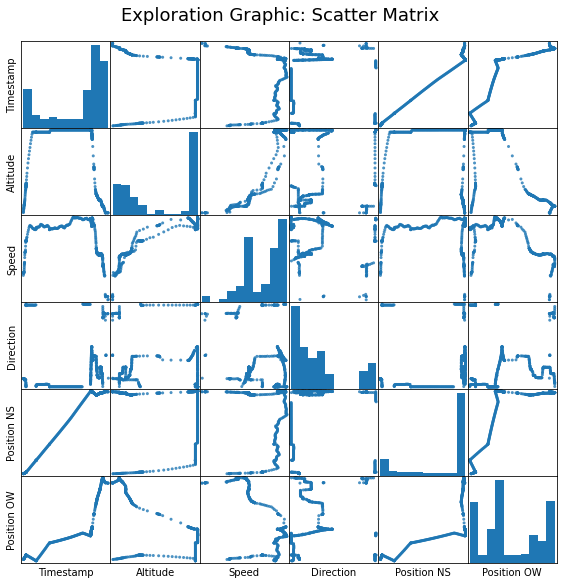

In [13]:
'''Exploratin Graphic'''
fig = plt.figure(figsize=[9.6,9.6])
ax = fig.add_subplot()
sc_matrix = pd.plotting.scatter_matrix(df, alpha=0.8, ax=ax) #Pandas Scattermatrix to detect dependencies, to find good diagrams for presentation, histograms to learn about the distribution of the values 
fig.suptitle("Exploration Graphic: Scatter Matrix", fontsize=18, y=0.93)

for ax in sc_matrix.ravel():
    ax.set_xticks([]) #graph shall just give an overview, details (such as ticks) not required
    ax.set_yticks([])

#fig.savefig('Plots/scatter_matrix.svg', bbox_inches='tight') #in Posterpräsentation wurde diese Grafik nicht verwendet
#fig.savefig('Plots/scatter_matrix.png', bbox_inches='tight') #stattdessen wurde die (fast) identische Grafik eine Zelle weiter unten verwendet

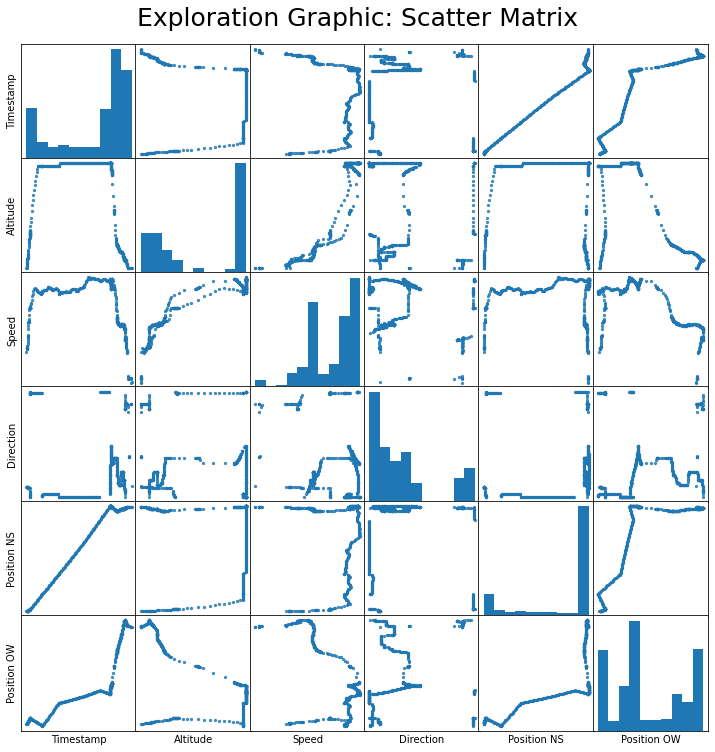

In [14]:
'''Selbe Grafik wie oben, nur manuell erstellt (falls Pandas plotting nicht verwendet werden darf)'''

cols=["Timestamp", "Altitude", "Speed", "Direction", "Position NS", "Position OW"]
fig = plt.figure(figsize=[9.6,9.6])

def scattermatrix_selfmade(df, cols, ax=ax):
    i=1
    for col in cols:
        for col2 in cols:
            ax = fig.add_subplot(len(cols),len(cols),i)
            i+=1
            if col==col2:
                ax.hist(df[col])
            else:
                ax.scatter(df[col2], df[col], s=5, alpha=0.8)
            ax.set_xticks([]) #graph shall just give an overview, details (such as ticks) not required
            ax.set_yticks([])
            if (i+len(cols)-2)%len(cols)==0:
                ax.set_ylabel(col)
            if i>(len(cols)**2)-len(cols)+1:
                ax.set_xlabel(col2)
                
scattermatrix_selfmade(df, cols)      

fig.tight_layout(pad=-0.5)
fig.suptitle("Exploration Graphic: Scatter Matrix", fontsize=25, y=1.06)

fig.savefig('Plots/scatter_matrix2.svg', bbox_inches='tight')
fig.savefig('Plots/scatter_matrix2.png', bbox_inches='tight')

- Um Zeitverläufe darzustellen muss die Uhrzeit ("UTC") für die X-Achse verwendet werden, da die Datensätze (Zeilen) nicht in regelmäßigen Zeitabschnitten genommen werden
- Für Altitude und Speed kann der zeitliche Verlauf gut dargestellt werden -> Presentation Graphic
- Wird die Direction über die Zeit dargestellt, kann man einen abrupten Richtungswechsel sehen -> für Presentation Graphic muss jedoch geeigneterer Grafiktyp gefunden werden
- Korrelation Altitude/Speed ist gut erkennbar -> Presentation Graphic
- Position NS und OW zeigt, wo das Flugzeug umgeleitet wurde -> müsste für Presentation Graphic mit gleichem Verhältnis X-/Y-Achse dargestellt werden, evtl. auf Karte

### Presentation Graphics

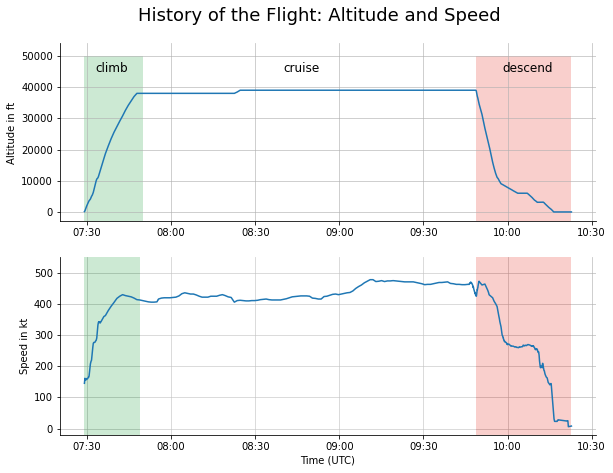

In [15]:
fig = plt.figure(figsize=(9.6,7.2))

ax1 = fig.add_subplot(211)
ax1.plot(df["UTC"], df["Altitude"], color="tab:blue", lw=1.5)
ax1.axvspan(df["UTC"].iloc[73],df["UTC"].iloc[272],facecolor='white', alpha=0.25)
ax1.axvspan(df["UTC"].iloc[0],df["UTC"].iloc[73],facecolor='#34A853', alpha=0.25)
ax1.axvspan(df["UTC"].iloc[272],df["UTC"].iloc[-1],facecolor='#EA4335', alpha=0.25)
ax1.axhspan(50000,55000,facecolor='white', alpha=1)
plt.ylim(-3000,54000)
ax1.text(df["UTC"].iloc[25], 45000, "climb", fontsize="large")
ax1.text(df["UTC"].iloc[132], 45000, "cruise", fontsize="large")
ax1.text(df["UTC"].iloc[340], 45000, "descend", fontsize="large")
ax1.grid(axis='both', alpha=0.75)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel("Altitude in ft")

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(df["UTC"], df["Speed"], color="tab:blue", lw=1.5)
ax2.axvspan(df["UTC"].iloc[begin],df["UTC"].iloc[end],facecolor='white', alpha=0.25)
ax2.axvspan(df["UTC"].iloc[0],df["UTC"].iloc[begin],facecolor='#34A853', alpha=0.25)
ax2.axvspan(df["UTC"].iloc[end],df["UTC"].iloc[-1],facecolor='#EA4335', alpha=0.25)
ax2.grid(axis='both', alpha=0.75)
ax2.set_axisbelow(True)
plt.ylim(-20,550)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylabel("Speed in kt")
ax2.set_xlabel("Time (UTC)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

fig.suptitle("History of the Flight: Altitude and Speed", fontsize=18, y=0.95)

fig.savefig('Plots/flight_history.svg', bbox_inches='tight')
fig.savefig('Plots/flight_history.png', bbox_inches='tight')

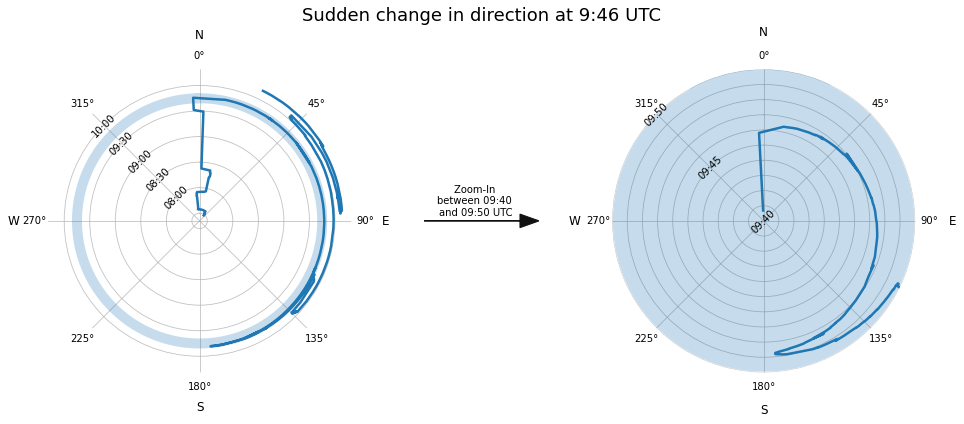

In [16]:
df_flightphase = df[0:-55] #slice of the DataFrame to eliminate the numerous changes in direction during start and landing

fig = plt.figure(figsize=[14.0,6.2])
ax1 = fig.add_subplot(1,5,(1,2), polar=True)

ax1.set_theta_zero_location("N") #Set 0° to the top
ax1.set_theta_direction(-1) #change direction

plt.gca().axes.yaxis.set_ticklabels([]) #remove ylabels

ax1.grid(alpha=0.8) #add grid
ax1.set_axisbelow(True)

#add ylabels manually:
ax1.text(315*np.pi/180, datetime.strptime('2021-05-23T08:00:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="08:00", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax1.text(315*np.pi/180, datetime.strptime('2021-05-23T08:30:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="08:30", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax1.text(315*np.pi/180, datetime.strptime('2021-05-23T09:00:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:00", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax1.text(315*np.pi/180, datetime.strptime('2021-05-23T09:30:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:30", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax1.text(315*np.pi/180, datetime.strptime('2021-05-23T10:00:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="10:00", rotation=45, va="center", ha="center", fontsize="medium", color="black")

ax1.plot(df_flightphase["Direction"]* np.pi/180, df_flightphase["UTC"], color="tab:blue", linewidth=2.5) #plot direction
ax1.plot(np.arange(0,359)* np.pi/180, np.full(359,datetime.strptime('2021-05-23T09:45:00Z', '%Y-%m-%dT%H:%M:%SZ')), alpha=0.25, linewidth=10) #mark background around 9:45 UTC 
ax1.set_facecolor("white")
ax1.spines["polar"].set_visible(False)

def plot_directions(ax, time_str='2021-05-23T11:00:00Z'): #add the directions N, S, W, E to the plot
    ax.text(0*np.pi/180, datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%SZ'), s="N", va="center", ha="center", fontsize="large", color="black")
    ax.text(180*np.pi/180, datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%SZ'), s="S", va="center", ha="center", fontsize="large", color="black")
    ax.text(270*np.pi/180, datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%SZ'), s="W", va="center", ha="center", fontsize="large", color="black")
    ax.text(90*np.pi/180, datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%SZ'), s="E", va="center", ha="center", fontsize="large", color="black")

plot_directions(ax1) #own function, see above

ax2 = fig.add_subplot(1,5,(4,5), polar=True) #add new subplot, which shows the zoomed-in version of the first plot

ax2.set_theta_zero_location("N") #set 0° to the top
ax2.set_theta_direction(-1) #change direction

plt.gca().axes.yaxis.set_ticklabels([]) #remove ylabels

#add ylabels manually:
ax2.text(315*np.pi/180, datetime.strptime('2021-05-23T09:40:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:40", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax2.text(315*np.pi/180, datetime.strptime('2021-05-23T09:45:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:45", rotation=45, va="center", ha="center", fontsize="medium", color="black")
ax2.text(315*np.pi/180, datetime.strptime('2021-05-23T09:50:00Z', '%Y-%m-%dT%H:%M:%SZ'), s="09:50", rotation=45, va="center", ha="center", fontsize="medium", color="black")

ax2.grid(alpha=0.8) #add grid
ax2.set_axisbelow(True)

ax2.plot(df_flightphase["Direction"]* np.pi/180, df_flightphase["UTC"], color="tab:blue", linewidth=2.5) #plot direction
ax2.plot(np.arange(0,358)* np.pi/180, np.full(358,datetime.strptime('2021-05-23T09:45:00Z', '%Y-%m-%dT%H:%M:%SZ')), alpha=0.25, linewidth=150) #mark the whole area (-> zoomed-in from first plot)

ax2.set_facecolor("white")
ax2.spines["polar"].set_visible(False)
plt.ylim(datetime.strptime('2021-05-23T09:40:00Z', '%Y-%m-%dT%H:%M:%SZ'), datetime.strptime('2021-05-23T09:50:00Z', '%Y-%m-%dT%H:%M:%SZ')) #set Y-Limits to zoom-in

plot_directions(ax2, time_str='2021-05-23T09:52:30Z') #plot directions N S W E, see above

ax3 = fig.add_subplot(153) #add little subplot in between, which contains an arrow and the "zoom-in message"
ax3.arrow(0.5,0.5, dx=1.25,dy=0, width = 0, head_length = 0.25, head_width =0.02, facecolor="#111111", edgecolor="#111111") #draw an arrow
ax3.text(1.175,0.505,s="Zoom-In \nbetween 09:40 \nand 09:50 UTC", ha="center", va="bottom") #zoom-in message
plt.ylim(0.25,0.75)
plt.xlim(0.5,2)
ax3.spines['top'].set_visible(False) #remove frame
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.set_yticks([]) #remove ticks and labels
ax3.set_xticks([])

fig.tight_layout(pad=3.0) #set distance between the subplots

fig.suptitle('Sudden change in direction at 9:46 UTC', fontsize=18) #set a title for the whole figure

fig.savefig('Plots/radar_plot.svg', bbox_inches='tight')
fig.savefig('Plots/radar_plot.png', bbox_inches='tight')

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) #import world-DataFrame (geopandas)
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities')) #import cities-DataFrame (geopandas)

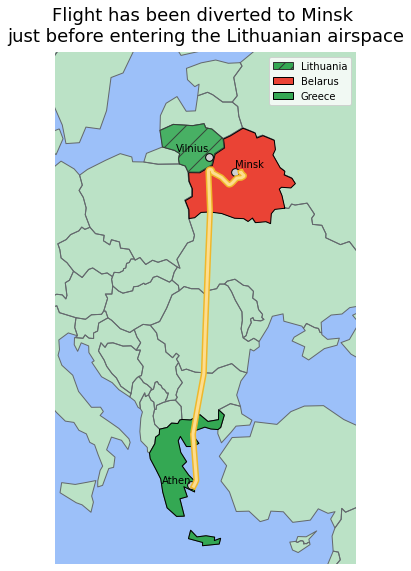

In [18]:
fig = plt.figure(figsize=(5.4,9.6))
ax = fig.add_subplot(111)

def plot_map(ax, plot_athen=True, zoom=1): #function to plot the desired map
    world.plot(ax=ax, #cmap="summer", 
                color="#BBE2C6", alpha=1) #plot european countries             
    world.plot(ax=ax, facecolor="none", edgecolor="#64696D")
    plt.gca().set_facecolor('#9cc0f9')
    fs="medium"
    if zoom>1:
        fs="large"
    #mark important countries
    belarus = world[world.name == 'Belarus']
    belarus.plot(ax=ax, edgecolor="black", color="#EA4335") #mark belarus (red as facecolor)
    litauen = world[world.name == 'Lithuania']
    lt = litauen.plot(ax=ax, edgecolor="#333333", color="#34A853", hatch='/', alpha=0.85) #mark lithuania (green, //)
    greece = world[world.name == 'Greece']
    greece.plot(ax=ax, edgecolor="black", color="#34A853") #mark greece (green)
    belarus_patch = mpatches.Patch(facecolor='#EA4335', label='Belarus', edgecolor="black")
    lithuania_patch = mpatches.Patch(facecolor='#34A853', label='Lithuania', hatch='//', edgecolor="#333333")
    greece_patch = mpatches.Patch(facecolor='#34A853', label='Greece', edgecolor="black")
    if plot_athen:
        plt.legend(handles=[lithuania_patch, belarus_patch, greece_patch])
    else:
        plt.legend(handles=[lithuania_patch, belarus_patch])
    
    #plot important cities and county namess
    vilnius = cities[cities.name == 'Vilnius']
    a, x, y = str(vilnius["geometry"].iloc[0]).split(" ")
    vilnius.plot(marker="o", ax=ax, edgecolor="black", color="#CFD0D1", markersize=60) #plot vilnius as square
    ax.text(float(x[1:]),float(y[0:-1])*1.003/zoom,s="Vilnius", va="bottom", ha="right", size=fs) #add label "Vilnius" to the square
    if plot_athen:
        athen = cities[cities.name=='Athens']
        a, x, y = str(athen["geometry"].iloc[0]).split(" ")
        athen.plot(marker="o", ax=ax, edgecolor="black", color="#CFD0D1", markersize=60) #plot athen as square
        ax.text(float(x[1:]),float(y[0:-1]),s="Athen", va="bottom", ha="right", size=fs) #add label "Athen" to square
    minsk = cities[cities.name=='Minsk']
    a, x, y = str(minsk["geometry"].iloc[0]).split(" ")
    minsk.plot(marker="o", ax=ax, edgecolor="black", color="#CFD0D1", markersize=60) #plot minsk as square
    ax.text(float(x[1:]),float(y[0:-1])*1.003/zoom,s="Minsk", va="bottom", ha="left", size=fs) #add label "Minsk" to square
    
plot_map(ax) #own function to plot the map, see above

plt.xlim(12,38)
plt.ylim(34,60)

outline=mpe.withStroke(linewidth=6, foreground='#EFB82B')
ax.plot(df["Position OW"], df["Position NS"], color="#FDDD8F", linewidth=3, path_effects=[outline])

ax.set_yticks([]) #remove ylabels
ax.set_xticks([]) #remove xlabels
ax.set_title("Flight has been diverted to Minsk \njust before entering the Lithuanian airspace", fontsize=18, y=1.01) #add title

plt.setp(ax.spines.values(), visible=False)

fig.savefig('Plots/map_single.svg', bbox_inches='tight')
fig.savefig('Plots/map_single.png', bbox_inches='tight')

C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


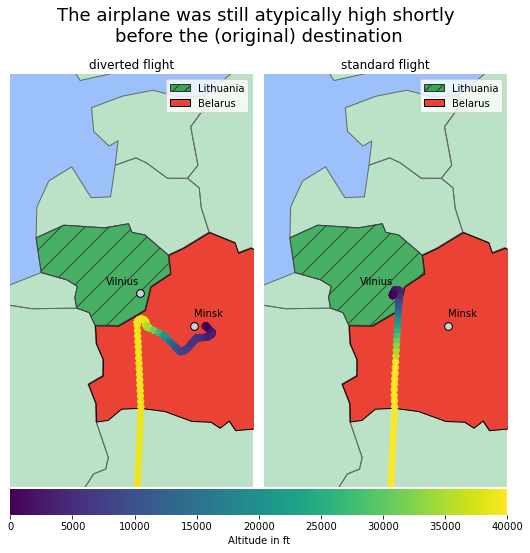

In [19]:
fig = plt.figure(figsize=(7.2,7.2))
ax = fig.add_subplot(121)

plt.xlim(20,30)
plt.ylim(50,60)
plot_map(ax, plot_athen=False) #own function to plot the map, see above

altitudes = np.concatenate([df["Altitude"],df_standardflug["Altitude"]], axis=0) #concatenate Altitude columns of both the redirected flight and the standard flight
min_alt, max_alt = altitudes.min(), altitudes.max() #get mininmum and maximum altitude (required for colorbar)

plt.scatter(df["Position OW"], df["Position NS"], c=df["Altitude"], s=40, cmap="viridis") #plot flight route of redirected flight (color represents altitude)
plt.clim(min_alt, max_alt) #set limits for color-values (required for colorbar)
ax.set_yticks([]) #remove ticks and labels
ax.set_xticks([])
ax.set_title("diverted flight")

ax2 = fig.add_subplot(122) #add new subplot for second flight (standard flight, for comparison)

plot_map(ax2, plot_athen=False) #plot the map

axp=plt.scatter(df_standardflug["Position OW"], df_standardflug["Position NS"], c=df_standardflug["Altitude"], s=40, cmap="viridis") #plot flight route of standard flight (color represents altitude)
plt.clim(min_alt, max_alt) #set limits for color-values (required for colorbar)
plt.xlim(20,30)
plt.ylim(50,60)
ax2.set_yticks([]) #remove ticks and labels
ax2.set_xticks([])
ax2.set_title("standard flight")
cbaxes = fig.add_axes([0.0208, 0, 0.958, 0.05])  #set position, width and length of the colorbar
cb = plt.colorbar(axp, cax = cbaxes, label="Altitude in ft", orientation='horizontal')#plot colorbar, same for both subplots (because of the climits)
plt.subplots_adjust(wspace=0.001)

plt.setp(ax.spines.values(), visible=False)
plt.setp(ax2.spines.values(), visible=False)
plt.setp(cbaxes.spines.values(), visible=False)

fig.suptitle("The airplane was still atypically high shortly \nbefore the (original) destination", fontsize=18) #add title for whole figure
fig.tight_layout()

fig.savefig('Plots/map_comparison.svg', bbox_inches='tight')
fig.savefig('Plots/map_comparison.png', bbox_inches='tight')

C:\Users\ti-he\.conda\envs\wwids120\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


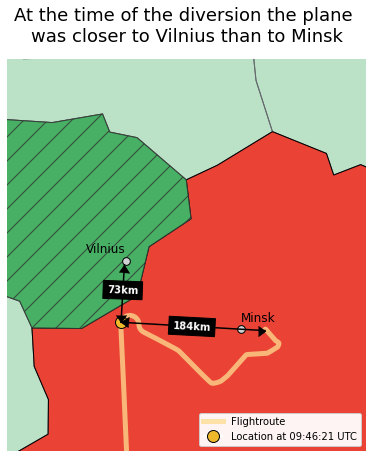

In [20]:
fig, ax = plt.subplots(figsize=(7.2,7.2))
plot_map(ax, plot_athen=False, zoom=1.002)
plt.xlim(23,30)
plt.ylim(52.5,57)
ax.plot(df["Position OW"], df["Position NS"], color="#FDDD8F", linewidth=5, alpha=0.75, label="Flightroute")
ax.plot(df["Position OW"].loc[df["UTC"]==datetime.strptime('2021-05-23T09:46:21Z', '%Y-%m-%dT%H:%M:%SZ')], df["Position NS"].loc[df["UTC"]==datetime.strptime('2021-05-23T09:46:21Z', '%Y-%m-%dT%H:%M:%SZ')], color="white", markerfacecolor="#EFB82B", markersize=12, marker='o', markeredgecolor="black", label="Location at 09:46:21 UTC")
ax.set_yticks([]) #remove ticks and labels
ax.set_xticks([])
ax.legend(loc='lower right', framealpha=0.95)

#Distanz berechnende Funktion
def distance(s_lat, s_lng, e_lat, e_lng): #Source: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points (Letzter Zugriff: 26.08.2021)
   # approximate radius of earth in km
   R = 6373.0
   s_lat = s_lat*np.pi/180.0
   s_lng = np.deg2rad(s_lng)
   e_lat = np.deg2rad(e_lat)
   e_lng = np.deg2rad(e_lng)
   d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2

   return 2 * R * np.arcsin(np.sqrt(d))

#Distance to Minsk Airport
koords_minsk_airport = (53.882024, 28.031280) #Landebahn auf Google-Maps
y_minsk_ap, x_minsk_ap = koords_minsk_airport
x_946 = df["Position OW"].loc[df["UTC"]==datetime.strptime('2021-05-23T09:46:21Z', '%Y-%m-%dT%H:%M:%SZ')]
y_946 = df["Position NS"].loc[df["UTC"]==datetime.strptime('2021-05-23T09:46:21Z', '%Y-%m-%dT%H:%M:%SZ')]
dis_to_minsk_ap = distance(y_946, x_946, y_minsk_ap, x_minsk_ap)

#Distance to Vilnius Airport
koords_vilnius_airport = (54.636744, 25.287460) #Landebahn auf Google-Maps
y_vil_ap, x_vil_ap = koords_vilnius_airport
x_946 = df["Position OW"].loc[df["UTC"]==datetime.strptime('2021-05-23T09:46:21Z', '%Y-%m-%dT%H:%M:%SZ')]
y_946 = df["Position NS"].loc[df["UTC"]==datetime.strptime('2021-05-23T09:46:21Z', '%Y-%m-%dT%H:%M:%SZ')]
dis_to_vil_ap = distance(y_946, x_946, y_vil_ap, x_vil_ap)

ax.plot([x_946, x_vil_ap], [y_946, y_vil_ap], color="black")
ax.plot([x_946], [y_946], color="black", marker=7, markersize=10)
ax.plot([x_vil_ap], [y_vil_ap], color="black", marker=6, markersize=10)
ax.plot([x_946, x_minsk_ap], [y_946, y_minsk_ap], color="black")
ax.plot([x_946], [y_946], color="black", marker=4, markersize=10)
ax.plot([x_minsk_ap], [y_minsk_ap], color="black", marker=5, markersize=10)
ax.text((x_minsk_ap-x_946)/2 + x_946 - 0.4, (y_minsk_ap-y_946)/2 + y_946, str(int(dis_to_minsk_ap))+"km", va='center', backgroundcolor="black", color="white", fontweight="bold", rotation=357)
ax.text((x_vil_ap-x_946)/2 + x_946, (y_vil_ap-y_946)/2 + y_946, str(int(dis_to_vil_ap))+"km", ha='center', backgroundcolor="black", color="white", fontweight="bold", rotation=358)
ax.set_title("At the time of the diversion the plane \nwas closer to Vilnius than to Minsk", fontsize=18, y=1.03)

plt.setp(ax.spines.values(), visible=False)

fig.savefig('Plots/map_distances.svg', bbox_inches='tight')
fig.savefig('Plots/map_distances.png', bbox_inches='tight')

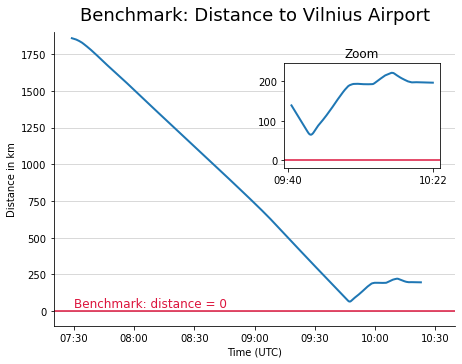

In [21]:
fig, ax = plt.subplots(figsize=(7.2,5.4))
xyPos = []
time_zoom = []
xyPos_zoom = []

#Erstelle Liste der Entfernungen zu jedem Zeitpunkt
iteration = 0
for i in df["Position NS"]:
    xyPos.append(distance(float(df["Position NS"].get(iteration)), float(df["Position OW"].get(iteration)), y_vil_ap, x_vil_ap))
    if iteration > 191:
        time_zoom.append(df["UTC"].get(iteration))
        xyPos_zoom.append(distance(float(df["Position NS"].get(iteration)), float(df["Position OW"].get(iteration)), y_vil_ap, x_vil_ap))
    iteration += 1

ax.set_title('Benchmark: Distance to Vilnius Airport', fontsize=18, y=1.02)
ax.set_ylabel('Distance in km')
ax.set_xlabel('Time (UTC)')
ax.plot(df["UTC"], xyPos, lw=2, label="Distance: redirected flight", c='tab:blue')
ax.axhline(y=0, color='crimson')
ax.text(df["UTC"].iloc[5], 25, "Benchmark: distance = 0", c='crimson', fontsize="large")
plt.ylim(-100, 1900)
plt.xlim(datetime.strptime('2021-05-23T07:20:00Z', '%Y-%m-%dT%H:%M:%SZ'), datetime.strptime('2021-05-23T10:40:00Z', '%Y-%m-%dT%H:%M:%SZ'),)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.6)

ax2 = plt.axes([.57, .53, .30, .27])
ax2.plot(time_zoom, xyPos_zoom, lw=2, label="Zoom", c='tab:blue')
ax2.set_title("Zoom")
plt.ylim(-20,245)
ax2.axhline(y=0, color='crimson')
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax2.set_xticks([df["UTC"].iloc[191], df["UTC"].iloc[-1]])

fig.savefig('Plots/distance_benchmark.svg', bbox_inches='tight')
fig.savefig('Plots/distance_benchmark.png', bbox_inches='tight')

[[1.         0.91337182]
 [0.91337182 1.        ]]


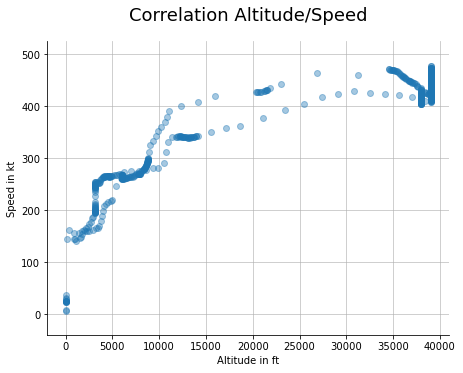

In [22]:
fig, ax = plt.subplots(figsize=(7.2,5.4))
ax.set_ylabel('Speed in kt')
ax.set_xlabel('Altitude in ft')
ax.set_title('Correlation Altitude/Speed', fontsize=18, y=1.05)
ax.scatter(df["Altitude"], df["Speed"], alpha=0.4)
ax.grid(axis='both', alpha=0.75)
plt.ylim(-40,525)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(np.corrcoef(df["Altitude"],df["Speed"])) #Korrelationskoeffizient ausgeben lassen

fig.savefig('Plots/correlation_altitude_speed.svg', bbox_inches='tight')
fig.savefig('Plots/correlation_altitude_speed.png', bbox_inches='tight')

In [23]:
def create_timetable(df):
    i=0
    l_begin=[]
    l_end=[]
    l_country=[]
    while i in range(len(df)):    
        country = df["Country"].iloc[i]
        l_time_per_country=[]
        while(i in range(len(df)) and df["Country"].iloc[i]==country):
            l_time_per_country.append(df["UTC"].iloc[i])
            i+=1
        try:
            l_time_per_country.append(df["UTC"].iloc[i])
        except IndexError:
            l_time_per_country.append(df["UTC"].iloc[i-1])
        l_begin.append(l_time_per_country[0]) 
        l_end.append(l_time_per_country[-1])
        l_country.append(country)
    df_time_in_country = pd.DataFrame(data={"Country":l_country,"Begin":l_begin,"End":l_end})
    df_time_in_country["Time"]=df_time_in_country["End"]-df_time_in_country["Begin"]
    total = df["UTC"].iloc[len(df)-1]-df["UTC"].iloc[0]
    print(total)
    df_time_in_country["Share"]=df_time_in_country["Time"]/total
    print(df_time_in_country["Share"].sum()) #muss 1 sein
    return df_time_in_country

df_time_in_country = create_timetable(df)
df_standardflug_time_in_country = create_timetable(df_standardflug)

df_time_in_country_new = pd.DataFrame(df_time_in_country["Country"].unique(), columns=["Country"])
df_time_in_country_new["diverted flight"]=[df_time_in_country["Share"].iloc[0]+df_time_in_country["Share"].iloc[2]+df_time_in_country["Share"].iloc[4],df_time_in_country["Share"].iloc[1]+df_time_in_country["Share"].iloc[3],df_time_in_country["Share"].iloc[5],df_time_in_country["Share"].iloc[6],df_time_in_country["Share"].iloc[7],df_time_in_country["Share"].iloc[8]]
df_time_in_country_new["diverted flight"]=df_time_in_country_new["diverted flight"]*100

df_standardflug_time_in_country_new = pd.DataFrame(df_standardflug_time_in_country["Country"].unique(), columns=["Country"])
df_standardflug_time_in_country_new["standard flight"]=[df_standardflug_time_in_country["Share"].iloc[0]+df_standardflug_time_in_country["Share"].iloc[2]+df_standardflug_time_in_country["Share"].iloc[4],df_standardflug_time_in_country["Share"].iloc[1]+df_standardflug_time_in_country["Share"].iloc[3],df_standardflug_time_in_country["Share"].iloc[5],df_standardflug_time_in_country["Share"].iloc[6],df_standardflug_time_in_country["Share"].iloc[7],df_standardflug_time_in_country["Share"].iloc[8],df_standardflug_time_in_country["Share"].iloc[9]]
df_standardflug_time_in_country_new["standard flight"]=df_standardflug_time_in_country_new["standard flight"]*100

df_time_joined = df_standardflug_time_in_country_new.join(df_time_in_country_new, lsuffix="_standard", rsuffix="_umgeleitet")
df_time_joined["Country"]=df_time_joined["Country_standard"]
df_time_joined = df_time_joined.drop(columns=["Country_standard","Country_umgeleitet"])
df_time_joined = df_time_joined.set_index("Country")
df_time_joined

0 days 02:53:44
1.0
0 days 02:39:44
1.0


,standard flight,diverted flight
Country,,
Greece,10.340150,7.319647
Sea,16.652755,12.682272
Bulgaria,11.602671,11.367997
Romania,20.033389,20.203377
Ukraine,20.012521,18.294321
Belarus,11.832220,30.132387
Lithuania,9.526294,NaN


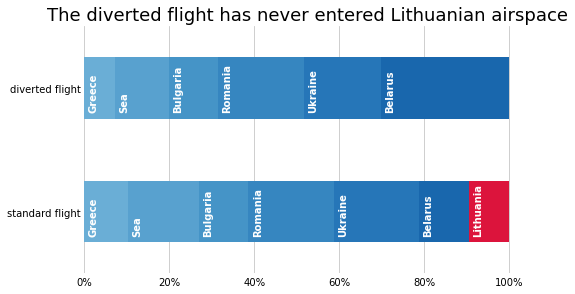

In [24]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(211)

df_time_joined.transpose().plot(kind='barh', stacked=True, ax=ax, color=['#6aaed6','#58a1cf','#4594c7','#3686c0','#2676b8','#1967ad','crimson'])

ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(axis='x', alpha=0.75)
ax.set_axisbelow(True)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_title("The diverted flight has never entered Lithuanian airspace", fontsize=18)

i=0
for p in ax.patches[0:-1]:
    if (i%2==0):
        ax.text(p.get_x()+1, p.get_y()+0.07, df_time_joined.index[int(i/2)], color = "white", rotation="vertical", fontweight='heavy')
    else:
        ax.text(p.get_x()+1, p.get_y()+0.07, df_time_joined.index[int((i-1)/2)], color = "white", rotation="vertical", fontweight='heavy')
    i+=1
    
fig.savefig('Plots/100_stacked_bars.svg', bbox_inches='tight') 
fig.savefig('Plots/100_stacked_bars.png', bbox_inches='tight') 